# Heart Disease Prediction 

# Importing Libraries 

In [1]:
import numpy as np                    
import pandas as pd                        
from sklearn.model_selection import train_test_split               
from sklearn.linear_model import LogisticRegression           
from sklearn.metrics import accuracy_score                     
import matplotlib.pyplot as plt                                
import seaborn as sns                                    

# Importing Dataset

In [2]:
heart_data = pd.read_csv('heart_disease_data.csv ')   

# Data Pre-Processing And Plotting Graphs

# Data Exploration 

In [3]:
heart_data.head(10)                           

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
heart_data.tail(10)                                       

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_data.shape                                

(303, 14)

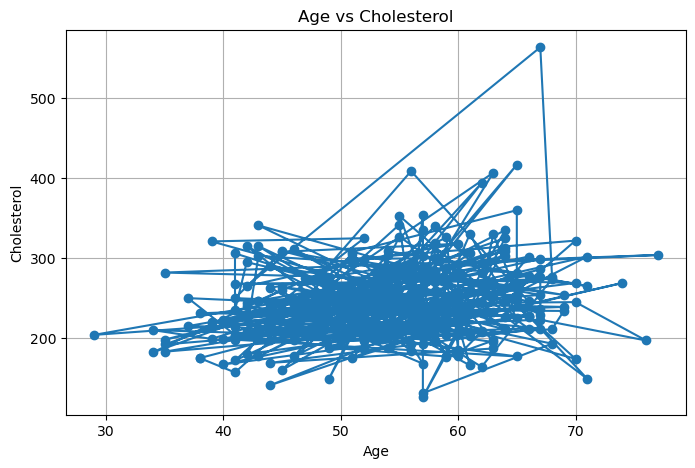

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(heart_data['age'], heart_data['chol'], marker='o')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

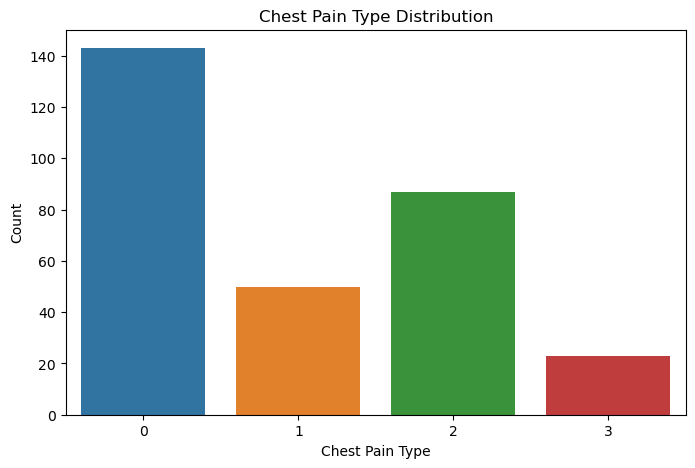

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', data=heart_data)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Handling Missing Data

In [8]:
missing_data = heart_data.isna()

In [9]:
print(missing_data)

       age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False  False    False    False  False   
301  False  False  False     False  False  False    False    False  False   
302  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  target  
0      False  False  False  Fal

In [10]:
heart_data = heart_data.fillna(value=0) 

In [11]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

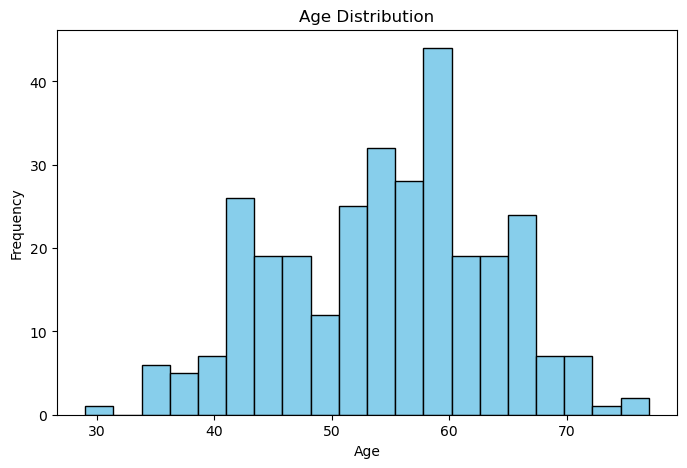

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(heart_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

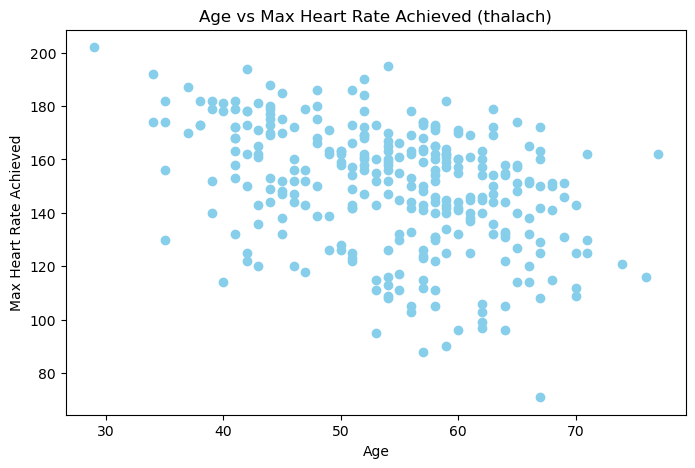

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(heart_data['age'], heart_data['thalach'], color='skyblue')
plt.title('Age vs Max Heart Rate Achieved (thalach)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.show()

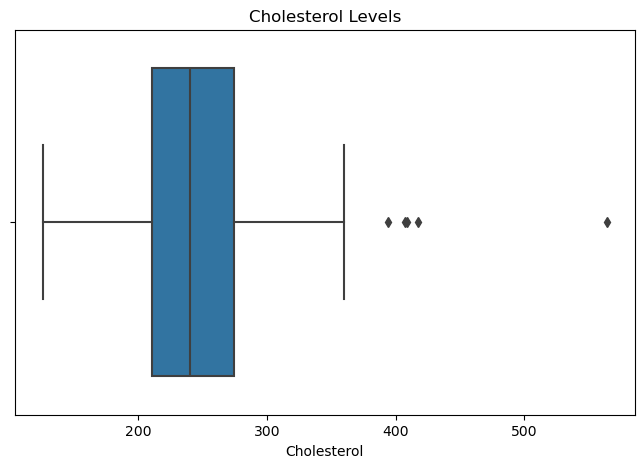

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='chol', data=heart_data)
plt.title('Cholesterol Levels')
plt.xlabel('Cholesterol')
plt.show()

In [17]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.765677,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.070933,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000


In [18]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# Splitting The Training and Testing Data for Model

In [19]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [20]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0        2   
1     37    1   2       130   250    0        1      187      0        3   
2     41    0   1       130   204    0        0      172      0        1   
3     56    1   1       120   236    0        1      178      0        0   
4     57    0   0       120   354    0        1      163      1        0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1        0   
299   45    1   3       110   264    0        1      132      0        1   
300   68    1   0       144   193    1        1      141      0        3   
301   57    1   0       130   131    0        1      115      1        1   
302   57    0   1       130   236    0        0      174      0        0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [21]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# Importing LogisticRegression 

In [24]:
model = LogisticRegression(max_iter=5000)

In [25]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

# Training Accuracy 

In [26]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8429752066115702


# Testing Accuracy 

In [28]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


# Input Data and Predict the Heart Defects 

In [30]:
#data format = (age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal)

# input_data = (37,1,2,130,250,0,3.5,0,0,0,0,0,2)              does not have a Heart Disease

input_data = (29,0,0,120,180,0,1.0,0,0,0,0,0,1)                #does not have a Heart Disease

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The person has Healthy Heart')
else:
  print('The person has a Defective Heart')

[0]
The person has Healthy Heart


C:\Users\udbhav srivastava\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
